# Introduction to ARM

Apriori Algorithm is a Machine Learning algorithm which is used to gain insight into the structured relationships between different items involved. Apriori Algorithm works by looking at the frequent itemsets in a dataset and then using that information to generate association rules. These association rules can then be used to make predictions about new data. For example, if you had a dataset of supermarket transactions, you could use Apriori Algorithm to find out which items are often bought together. This information could then be used to make recommendations to customers, such as suggesting they buy bread when they buy milk. Apriori Algorithm is a powerful tool for understanding relationships within data, and can be used in a variety of applications.

In this section, we will apply Apriori Algorithm  to our tweet text data to see teh connection of the words in these tweet messages.


In [1]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 


# Train ARM model on Tweets

## Data Preparation

The data I am going to use is the one we collected from pervious section and contains 2500 tweets. All of them are posed in English and related to the marijuana, cannabis and weed. Since they are all text-liked and are readable for us but not for computer, the first thing I need to do is to transform these tweet into 'computer readable' format. Here, I am going to do things called 'Lemmatization' and 'Tokenization'. 

<br>
<li>Lemmatization: Lemmatization is basically grouping together words with the same root or lemma but with different inflections or derivatives of meaning so they can be analyzed as one item. The aim is to take away inflectional suffixes and prefixes to bring out the word’s dictionary form(Techslang, 2022). </li>
<br>
<li>Tokenization: this is a lot easier than lemmatization and it just simply break chunk of text into list of sentences or list of words</li>
<br>
If you feel like still a little confused, I will show you some example using our dataset


In [15]:
df=pd.read_csv('clean_tweet_tone_df.csv')
df

,Unnamed: 0,Date,Language,Text,clean_text,tone
0,0,2022-09-11 22:22:28+00:00,en,All the medical pain and all the taxes spent p...,medical pain taxes spent putting people jail s...,-0.9531
1,1,2022-09-11 22:21:26+00:00,en,A good way to clean up your follower list is t...,good way clean follower list app called see fo...,0.9184
2,2,2022-09-11 22:12:16+00:00,en,@1zzyzyx1 @MeidasTouch @CharlieCrist legalize ...,legalize marijuana remove barriers desantis p...,-0.4404
3,3,2022-09-11 22:11:15+00:00,en,RT @snoopdoggslungz: 📸 Chem D\n🌱(ig) https://t...,rt chem d ig,0.0000
4,4,2022-09-11 22:06:53+00:00,en,@BabzOnTheMic Off the weed bro. That’s 4 strai...,weed bro thats straight losses miami pats lon...,-0.6369
...,...,...,...,...,...,...
2495,2495,2022-09-07 21:20:14+00:00,en,I just caught someone smoking their weed pen i...,caught someone smoking weed pen class hahahaha...,0.4019
2496,2496,2022-09-07 21:17:48+00:00,en,@AesPolitics And research shows black and brow...,research shows black brown people disproporti...,0.0000
2497,2497,2022-09-07 21:17:39+00:00,en,Smoke weed “ your not responsible and mentally...,smoke weed responsible mentally sick sober ser...,-0.8625
2498,2498,2022-09-07 21:09:58+00:00,en,"People who call weed, cannabis. https://t.co/m...",people call weed cannabis,0.0000


Here is the dataset, I am going to use.

## Tokenization and Lemmatization

Here is the result after done Tokenization and Lemmatization. We can see that we have 2500 tweets and there are 5867 different words among these tweets.

In [26]:
import csv
#USER PARAM
compute_sentiment 	=	True		
sentiment    		=	[]			#average sentiment of each chunck of text 
ave_window_size		=	250			#size of scanning window for moving average
					

#OUTPUT FILE
output='transactions.txt'
if os.path.exists(output): os.remove(output)

#INITIALIZE
lemmatizer 	= 	WordNetLemmatizer()
ps 			=	PorterStemmer()
sia 		= 	SentimentIntensityAnalyzer()

#ADD MORE
#stopwords	=	stopwords.words('english')
add=['mr','mrs','wa','dr','said','back','could','one','looked','like','know','around','dont']
for sp in add: stopwords.append(sp)

def read_and_clean():
	global sentiment 


	#BREAK INTO CHUNKS (SENTANCES OR OTHERWISE)
	sentences=df['clean_text'].to_list()

	print("NUMBER OF SENTENCES FOUND:",len(sentences)); #print(sentences)

	#CLEAN AND LEMMATIZE
	keep='0123456789abcdefghijklmnopqrstuvwxy';

	new_sentences=[]; vocabulary=[]
	for sentence in sentences:
		new_sentence=''

		# REBUILD LEMITIZED SENTENCE
		for word in sentence.split():
			
			#ONLY KEEP CHAR IN "keep"
			tmp2=''
			for char in word: 
				if(char in keep): 
					tmp2=tmp2+char
				else:
					tmp2=tmp2+' '
			word=tmp2

			#-----------------------
			# INSERT CODE TO LEMMATIZE THE WORDS
			new_word=lemmatizer.lemmatize(word)
			#-----------------------

			#REMOVE WHITE SPACES
			new_word=new_word.replace(' ', '')

			#BUILD NEW SENTANCE BACK UP
			if( new_word not in stopwords):
				if(new_sentence==''):
					new_sentence=new_word
				else:
					new_sentence=new_sentence+','+new_word
				if(new_word not in vocabulary): vocabulary.append(new_word)

		#SAVE (LIST OF LISTS)		
		new_sentences.append(new_sentence.split(","))
		new_sentences
		#print(new_sentences)
		#SIA
		if(compute_sentiment):
			#-----------------------
			# INSERT CODE TO USE NLTK TO DO SENTIMENT ANALYSIS 
			text1=new_sentence.replace(',',' ')
			score = sia.polarity_scores(text1)
			sentiment.append([score['neg'],score['neu'],score['pos'],score['compound']])
			#-----------------------
			
		#SAVE SENTANCE TO OUTPUT FILE
		if(len(new_sentence.split(','))>2):
			f = open(output, "a")
			f.write(new_sentence+"\n")
			f.close()

	sentiment=np.array(sentiment)
	print("TOTAL AVERAGE SENTEMENT:",np.mean(sentiment,axis=0))
	print("VOCAB LENGTH",len(vocabulary))
	return new_sentences

transactions=read_and_clean()
print("First 5 tweets after Tokenization and Lemmatization:")
print(transactions[0:5])


NUMBER OF SENTENCES FOUND: 2500
TOTAL AVERAGE SENTEMENT: [0.1012328  0.7450916  0.153676   0.08015548]
VOCAB LENGTH 5867
First 5 tweets after Tokenization and Lemmatization:
[['medical', 'pain', 'tax', 'spent', 'putting', 'people', 'jail', 'sin', 'big', 'pharma', 'fear', 'legal', 'marijuana', 'amp', 'terrorism', 'victim', 'blocked', 'u', 'gover', 'via'], ['good', 'way', 'clean', 'follower', 'list', 'app', 'called', 'see', 'follow', 'go', 'long', 'list', 'weed', 'plus', 'find', 'block', 'every', 'time', 'lmao', 'free', 'highly', 'recommended', 'go', 'get'], ['legalie', 'marijuana', 'remove', 'barrier', 'desantis', 'put', 'place', 'block', 'voting', 'including', 'incarcerated'], ['rt', 'chem', 'ig'], ['weed', 'bro', 'thats', 'straight', 'loss', 'miami', 'pat', 'longer', 'threat', 'afc', 'east']]


Here is the Comparison Before and After Tokenization and Lemmatization using first tweet as example.
<br>
We can clearly see that the sentence is broken into word list (tokenization) and word 'taxes' becomes 'tax' (lemmatization)

In [27]:
print("    ")
print("Comparison Before and After Tokenization and Lemmatization")
print("    ")
print(df['clean_text'].to_list()[0])
print("    ")
print('---------------------After Tokenization and Lemmatization----------------------------------- ')
print("    ")
print(transactions[0:5][0])

    
Comparison Before and After Tokenization and Lemmatization
    
medical pain taxes spent putting people jail sin big pharma fears legal marijuana amp terrorism victims blocked us gover via 
    
---------------------After Tokenization and Lemmatization----------------------------------- 
    
['medical', 'pain', 'tax', 'spent', 'putting', 'people', 'jail', 'sin', 'big', 'pharma', 'fear', 'legal', 'marijuana', 'amp', 'terrorism', 'victim', 'blocked', 'u', 'gover', 'via']


##  Sentiment Analysis

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker (Python).
Here I am going to use the function called “SentimentIntensityAnalyzer” to analysis the tone of each tweets. For each tweet, we’ll get four values, corresponding to “negative”, “neutral”, “positive” and “compound”. The first three values will be in the range 0 to 1, the last value representing the combination of the first three values will be in the range -1 to 1. If the tone of this tweet represents a like, the compound value will be close to 1, and if the tone of this tweet is a hate, it will be close to -1.

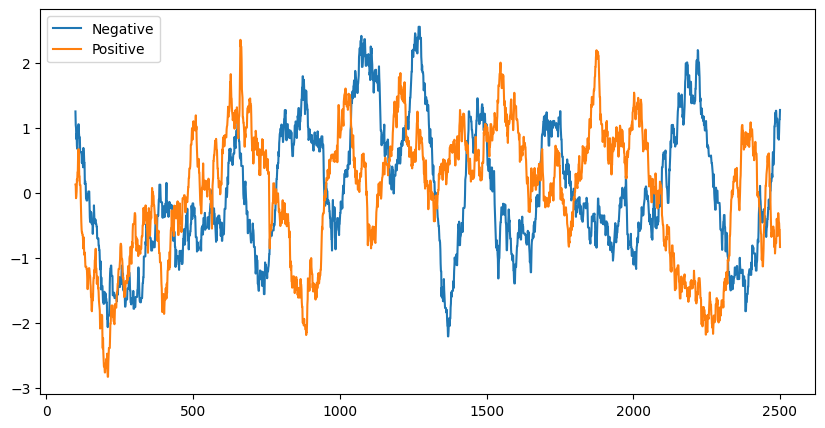

In [4]:
from sklearn import preprocessing
def moving_ave(y,w=100):
	#-----------------------
	# INSERT CODE TO COMPUTE THE MOVING AVERAGE OF A SIGNAL Y
	#-----------------------
	res=pd.DataFrame(y).rolling(w).mean()
	return preprocessing.scale(res)

# INSERT CODE TO VISUALIZE THE SENTIMENT ANALYSIS AS A TIME-SERIES (SEE PLOT FOR AN EXAMPLE)

neg=moving_ave(sentiment[:,0])

neu=moving_ave(sentiment[:,1])

pos=moving_ave(sentiment[:,2])


text_num = np.linspace(0,len(sentiment),len(sentiment))

plt.figure(figsize=(10,5))
plt.plot(text_num,neg,label='Negative')
plt.plot(text_num,pos,label='Positive')
plt.legend(loc='upper left')
plt.show()

Here is the line plot for the sentiment score for each tweet.

## Transform input Tweet data

So after done tokenization and lemmanization, we got a list of word list where each word list represent a tweet content. Now, I'm going to transfer them into Pandas data frame format which is more straightforward and can be directly used for model training.

In [5]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        # print("=====================================")
        # print(results[i])
        # print(len(list(results[i])))
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

In [6]:
def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [7]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Dracula')
    plt.show()


In [8]:
pd.DataFrame(transactions)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,medical,pain,tax,spent,putting,people,jail,sin,big,pharma,...,None,None,None,None,None,None,None,None,None,None
1,good,way,clean,follower,list,app,called,see,follow,go,...,None,None,None,None,None,None,None,None,None,None
2,legalie,marijuana,remove,barrier,desantis,put,place,block,voting,including,...,None,None,None,None,None,None,None,None,None,None
3,rt,chem,ig,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,weed,bro,thats,straight,loss,miami,pat,longer,threat,afc,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,caught,someone,smoking,weed,pen,class,hahahahahahahaha,yes,yt,None,...,None,None,None,None,None,None,None,None,None,None
2496,research,show,black,brown,people,disproportionately,impacted,prohibition,cannabis,right,...,None,None,None,None,None,None,None,None,None,None
2497,smoke,weed,responsible,mentally,sick,sober,serious,bout,life,fuck,...,None,None,None,None,None,None,None,None,None,None
2498,people,call,weed,cannabis,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Here is the input dataset after done transformation. We can see each row represent each tweet and we tokenize the all the tweets into single word. We also call this format 'Transaction'

## Training model and Result

In [12]:
results=list(apriori(transactions,min_support = 0.038))


In [29]:
pd_results=reformat_results(results)
#print("Results\n",pd_results)
pd_results


,rhs,lhs,supp,conf,supp x conf,lift
0,[ca],[cannabis],0.0408,0.350515,0.014301,1.656500
1,[cannabis],[ca],0.0408,0.192817,0.007867,1.656500
2,[ca],[rt],0.0416,0.357388,0.014867,1.639396
3,[rt],[ca],0.0416,0.190826,0.007938,1.639396
4,[ca],[weed],0.0460,0.395189,0.018179,0.764093
5,[weed],[ca],0.0460,0.088940,0.004091,0.764093
6,[cannabis],[rt],0.0724,0.342155,0.024772,1.569518
7,[rt],[cannabis],0.0724,0.332110,0.024045,1.569518
8,[city],[county],0.0384,0.864865,0.033211,19.134178
9,[county],[city],0.0384,0.849558,0.032623,19.134178


Here is our result set.
<br>
<li>supp: represents 'Support' and it can describe how common the set is. For example, Sup(A, B): Measures How often item-set with A and items in B occur together relative to all other transactions </li>
<br>
<li>conf: represents 'Confidence'. For example, Conf(A, B) Measures how often items in A and items in B occur together, relative to transactions that contain A</li>

<br>
<li>supp x conf:is the product of support and confidence; Large support means frequently occurring rules, and large confidence means “strong” rules therefore a large products suggests the rule is frequent and strong</li>
<br>
<li>lift: is the ratio of the observed support to that expected if X and Y were independent. It given by the following equation: Lift(X,Y) = Supp(X and Y)/(Supp(X)*Supp(Y))</li>
<br>

# Network Visualization

Network visualization is the practice of creating and displaying graphical representations of network devices, network metrics, and data flows. It involves the visualization of the relationships (edges or links) between data elements (nodes).

Based on the result, lets visualize it 

                   rhs                 lhs    supp      conf  supp x conf  \
0                 [ca]          [cannabis]  0.0408  0.350515     0.014301   
1           [cannabis]                [ca]  0.0408  0.192817     0.007867   
2                 [ca]                [rt]  0.0416  0.357388     0.014867   
3                 [rt]                [ca]  0.0416  0.190826     0.007938   
4                 [ca]              [weed]  0.0460  0.395189     0.018179   
5               [weed]                [ca]  0.0460  0.088940     0.004091   
6           [cannabis]                [rt]  0.0724  0.342155     0.024772   
7                 [rt]          [cannabis]  0.0724  0.332110     0.024045   
8               [city]            [county]  0.0384  0.864865     0.033211   
9             [county]              [city]  0.0384  0.849558     0.032623   
10              [city]             [court]  0.0380  0.855856     0.032523   
11             [court]              [city]  0.0380  0.969388     0.036837   

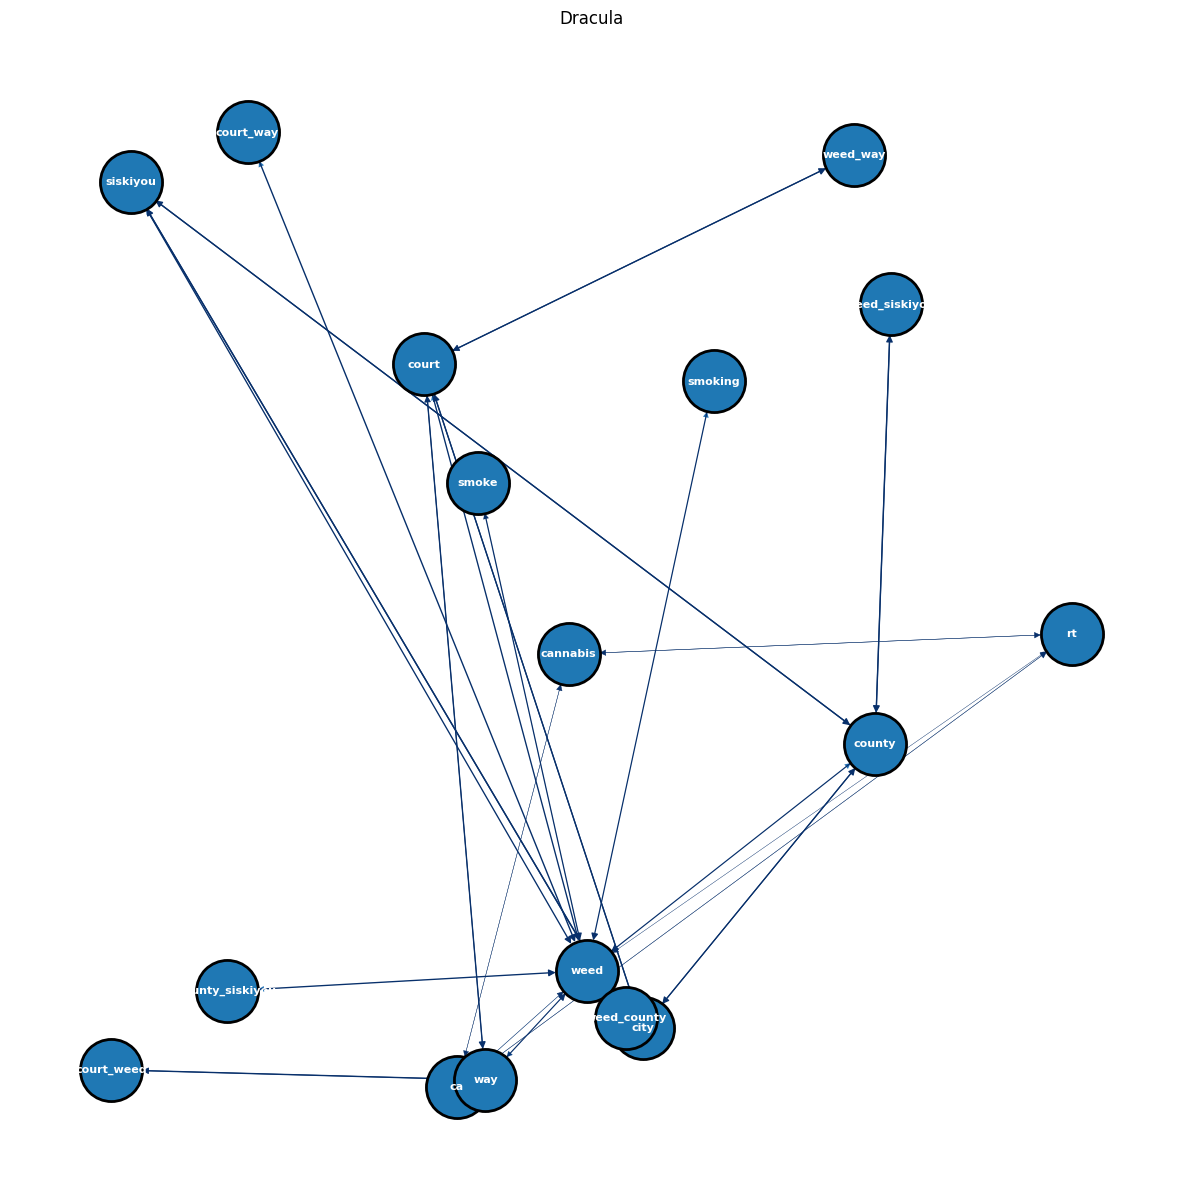

In [14]:
G=convert_to_network(pd_results)
plot_network(G)

# Summary


Based on the network visualization, we can see (Smoke, Weed) is the common set showing in these 2500 tweets and it actually make senses because it reasonable to have the set like this. Also, some other set like (ca, cannabis), (ca,weed) etc. It makes sense whether CA means California or Canada. Because whether it is California or Canada, the smoking marijuana is legal. The one interesting me most is the sets (siskiyou, county) and (county, weed). I don't know why I would get these two sets in return with such hight correlation between these word, until I did some research that siskiyou is actually a city in California and there is a town called weed.

# Reference

Techslang. (2020, November 20). What is lemmatization? - definition by Techslang. Techslang. Retrieved November 28, 2022, from https://www.techslang.com/definition/what-is-lemmatization/ 

Python: Sentiment analysis using Vader. GeeksforGeeks. (2021, October 7). Retrieved November 28, 2022, from https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ 